C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


label encoding done
view the encoded data
[[13 1 45]
 [13 576 101]
 [11 576 101]
 ...
 [13 18239 107]
 [11 18239 107]
 [4 18239 107]]
LR_RMSE= 43442927.564584635
DT_RMSE= 82616389.66194257
average of venture type : :  11748949.129489528
average of seed type : :  719817.9969071728
average of angel type : :  958694.4697530865
average of private_equity type : :  73308593.02944215


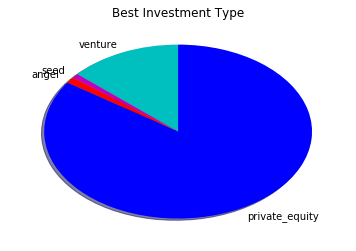

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#1.Loaded the companies and rounds data  into two data frames and name them companies and rounds2 respectively.
companies = pd.read_csv ('companies_d.csv',encoding = "ISO-8859-1")
#print(companies.head())
#print("total records in companies",companies.shape)
rounds2 = pd.read_csv ('rounds2.csv', encoding = "ISO-8859-1")
#print(rounds2.head())
#print("total records in rounds2",rounds2.shape)




#2. Merge both the datasets


companies['permalink']=companies['permalink'].str.lower() 
rounds2['company_permalink']=rounds2['company_permalink'].str.lower() 

# merged companies and rounds2 dataframe to produce new desired dataframe named master_frame
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink', how='left')
#print(master_frame.head())
#master_frame.to_csv("master_frame.csv")


#this is the merged dataset, further every analysis we will follow this.
finaldataset = pd.read_csv ('master_frame.csv', encoding = "ISO-8859-1")
#print(finaldataset)

#X = finaldataset.iloc[:,0:17].values
X= finaldataset.iloc[:, [3,8,12]].values   #3 is funding type, 8 is name of the company and 12 is country
y = finaldataset.iloc[:, 17].values
#print(X)
y= y.reshape(-1,1)
#print(y)




# Imputation done on missing values
from sklearn.preprocessing import Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', 
                               axis = 0) 
missingValueImputer = missingValueImputer.fit (y)

y = missingValueImputer.transform(y)
#print(y)



from sklearn.preprocessing import LabelEncoder
labelencoder_iv=LabelEncoder()
X[:,0]=labelencoder_iv.fit_transform(X[:,0] .astype(str))
#print(X[:,0])
X[:,1]=labelencoder_iv.fit_transform(X[:,1] .astype(str))
#print(X[:,1])
X[:,2]=labelencoder_iv.fit_transform(X[:,2] .astype(str))
#print(X[:,2])
print("label encoding done")
print("view the encoded data")
print(X)

from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test=train_test_split(X,y,test_size=0.2,random_state=0)

#For RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

#6.Linear Regrassion 
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(iv_train,dv_train)

LR_predict=LR.predict(iv_test)
LR_rmse=sqrt(mean_squared_error(dv_test,LR_predict))
print("LR_RMSE=",LR_rmse)



#7.Decision Tree
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(iv_train,dv_train)

DT_predict=DT.predict(iv_test)
DT_rmse=sqrt(mean_squared_error(dv_test,DT_predict))
print("DT_RMSE=",DT_rmse)




#Lets calculate the average of each type of investment type so that new investment company can choose which is the best investment type 


#calculating average funding amount of Ventures
ventures = rounds2.iloc[:,5]
#avg_venture = rounds2.query(ventures == "venture" )  

df_filtered_ventures = rounds2[(rounds2.funding_round_type == "venture")]
#print(df_filtered_ventures)
df_filtered_ventures.to_csv('ventures.csv')
ven = pd.read_csv('ventures.csv',encoding = "ISO-8859-1")
avg_ventures = ven.iloc[:,6].mean()
print("average of venture type : : ",avg_ventures)   #  11748949.129489528



# calculating average funding amount of seed

df_filtered_seed = rounds2[(rounds2.funding_round_type == "seed")]
#print(df_filtered_seed)
df_filtered_seed.to_csv('seed.csv')
sed = pd.read_csv('seed.csv',encoding = "ISO-8859-1")
avg_seed = sed.iloc[:,6].mean()
print("average of seed type : : ",avg_seed)   #719817.9969071728




# calculating average funding amount of angel

df_filtered_angel = rounds2[(rounds2.funding_round_type == "angel")]
#print(df_filtered_angel)
df_filtered_angel.to_csv('angel.csv')
angl = pd.read_csv('angel.csv',encoding = "ISO-8859-1")
avg_angl = angl.iloc[:,6].mean()
print("average of angel type : : ",avg_angl)   #958694.4697530865
 



# calculating average funding amount of private equity

df_filtered_prvt = rounds2[(rounds2.funding_round_type == "private_equity")]
#print(df_filtered_prvt)
df_filtered_prvt.to_csv('private_equity.csv')
prvt = pd.read_csv('private_equity.csv',encoding = "ISO-8859-1")
avg_prvt = prvt.iloc[:,6].mean()
print("average of private_equity type : : ",avg_prvt)    #73308593.02944215





# pie chart for , which investment type is the most suitable (venture, seed, angel, private_equity)
slices = [avg_ventures,avg_seed,avg_angl,avg_prvt]
activities = ['venture','seed','angel','private_equity']
cols = ['c','m','r','b']
outside = (0, 0, 0, 0) 
plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
		explode=outside,
		shadow=True,
       )

plt.title('Best Investment Type')
plt.show()



